# COGS 118A- Project Checkpoint

# Names


- Arturo Sorensen
- Emmanuel Gutierrez
- Hector Gallo
- Jai Mali
- Marco Paredes

# Abstract 
This section should be short and clearly stated. It should be a single paragraph <200 words.  It should summarize: 

This project has the goal of using machine learning algorithm methods, like regression models, to predict a soccer player's future contract by using their performance statistics, age, position, future potential, background, current team, agent, remaining years in current contract and marketing potential as the data. The contract variables that this project will predict are the player's transfer market value, annual salary, release clause, and potential bonuses. We will take the data and utilize regression models and data visualization in order to analyze and show the relationships between the different variables. We will be able to check for performance by comparing the predictions to actual contracts on similar players, as we would predict for the new contract to be similar to the mean of the others. Determining the potential value of a player’s contract would be very useful for clubs, as trading players is an important part of the sport, and it can aid in the team’s decision making for players. In the grand scheme of things, this can be a great indicator for global economics and its influence on sports and vice versa. We can learn trends on how players are given contracts and under what conditions they are given the value they receive. We can also learn from the reflection this has on the value of the club and sport and thus the economies involved.


# Background

   In order to have a good understanding of how algorithms have been used to predict a football player's market value, we researched how others have achieved this and what they used to make such predictions. Creating the most objective machine learning algorithm possible is very important since day by day, metrics and data become more and more important when it comes to the investing of money in different sectors, including football. An organization that has been using a strong algorithm to make player's market value predictions is the Football Observatory, also known as the CIES, which is a site that since 2013 has developed an econometric technique to calculate any player's transfer value using the player's objective performance (CIES Football Index), which takes the following into consideration: ability to minimize goal opportunities through one-to-one dueling, ability to minimize goal opportunities through ball interception, percentage of accurate passes, percentage of successful dribbles, ability to set teammates in favorable goal positions (assists) and percentage of shots on target.[1]
    
   In our research for prior work, we came upon a very detailed project that aimed at predicting a player's future performance based on past performances. One of the primary goals of the algorithm designed by the creators of this project was to remove human bias from the predictions as much as possible and create objective inferences. They created a supervised machine learning algorithm following these steps: loading and cleaning data, defining a target variable, deciding which model to use, in this case: a tree-based model, choosing what data visualizations to use, and analyzing them to adjust our model to make the most accurate predictions. Although the goal of this project was to predict future performance and the goal of our project is to predict market value, we thought it would be a great idea to use this project as a template in terms of what steps we should follow to arrive at our conclusions in the most optimal way. Also, since performance tends to be very closely associated with market value, our model would be very similar to the one being used in this project.[2]
    
   In order to understand the principles of football player transfer market contracts, we proceeded to investigate more about transfer principles since there are many variables that come into play when predicting the final market value in a buying contract. This article explains what a transfer is, which put in simple terms, is when a player's registration details switch from one football association to another. The transfer fee is the amount of money that the buying side has to pay for since the selling party will not have access to the player's services and they need compensation for it. This compensation can be both in the form of solely monetary value or a combination of money and a player in exchange. "Add ons" can also play a role in the final value of the transfer fee since it's money that the buying team can pay in addition to the transfer fee, which is paid for depending on certain goals that the buying team sets for the player.[3]


# Problem Statement

The goal is to predict the financial value of a soccer player in the transfer market. We do this by taking into account the features/information of the player and quantifying them as our metrics (for more details, see Evaluation Metrics section below). We are planning on 1. Utilizing a linear regression model (which can also be applied on nonlinear data if we normalize the data points) with a certain amount of metrics to then find the relationship and predict the financial value of a player’s contract and/or 2. using decision trees to possibly classify the players financially in groups. We suspect that some/most of the variables are not going to be as important as some other features, so we might use Lasso. Something else to note is that human bias on players can affect the contract (in a positive or negative way) and not reflect the true, deserved value of that specific player. We hope that by cutting down this human bias, clubs can avoid losing players due to an undeservingly low offer, avoid offering too much to players who do not meet those expectations, or simply find undiscovered talent thanks to the model.

# Data

Reference #1:

Link: https://www.transfermarkt.us/primera-division/marktwerte/wettbewerb/ES1
Description: The number of observations is going to be determined when we actually start performing analysis on them since they're constantly changing, but the number of variables is five.
Observation: An observation in this dataset consists of the player's name, nationality, club, age, position, and transfer value.
Special Handling and Cleaning: This dataset is already tidy and doesn't need to be cleaned, it just needs to be imported
Reference #2:

Link: https://football-observatory.com/IMG/sites/instatindex/
Description: The number of observations will also be determined when we actually start performing analysis on them since they're also constantly changing game after game, but the number of variables is five.
Observations: An observation in this dataset consists of player's ranking, perfomance index, name, club, and birth.
Special Handling and Cleaning: This dataset is already tidy and doesn't need to be cleaned, it just needs to be imported and merged with the other dataset.
Reference #3:

Link: https://www.kaggle.com/datasets/stefanoleone992/fifa-20-complete-player-dataset
Description: The number of observations will also be determined when we actually start performing analysis one them since they're also constantly changing game after game, but the number of variables is ten.
Observations: An observation in this dataset consists of player's sofifa id, player_url, short name of the player, long name of the player, age, date of birth, height, weight, nationality, and club.
Special Handling and Cleaning: this dataset will need some cleaning and arranging of the url into a readable dataset.


In [1]:
#How we cleaned the data

In [2]:
import pandas as pd
import numpy as np

#importing the data
data_18 = pd.read_csv("players_18.csv")
data_19 = pd.read_csv("players_19.csv")
data_20 = pd.read_csv("players_20.csv")
data_21 = pd.read_csv("players_21.csv")
data_22 = pd.read_csv("players_22.csv")

#keeping only the columns we need
data_18 = data_18.get(['short_name', "value_eur", "wage_eur", "overall", "potential", "age", "nationality_name", "player_positions", "league_name", "club_name", "club_joined", "club_contract_valid_until", "height_cm", "weight_kg", "pace", "dribbling", "shooting", "passing", "defending", "physic"])

data_19 = data_19.get(['short_name', "value_eur", "wage_eur", "overall", "potential", "age", "nationality_name", "player_positions", "league_name", "club_name", "club_joined", "club_contract_valid_until", "height_cm", "weight_kg", "pace", "dribbling", "shooting", "passing", "defending", "physic"])

data_20 = data_20.get(['short_name', "value_eur", "wage_eur", "overall", "potential", "age", "nationality_name", "player_positions", "league_name", "club_name", "club_joined", "club_contract_valid_until", "height_cm", "weight_kg", "pace", "dribbling", "shooting", "passing", "defending", "physic"])

data_21 = data_21.get(['short_name', "value_eur", "wage_eur", "overall", "potential", "age", "nationality_name", "player_positions", "league_name", "club_name", "club_joined", "club_contract_valid_until", "height_cm", "weight_kg", "pace", "dribbling", "shooting", "passing", "defending", "physic"])

data_22 = data_22.get(['short_name', "value_eur", "wage_eur", "overall", "potential", "age", "nationality_name", "player_positions", "league_name", "club_name", "club_joined", "club_contract_valid_until", "height_cm", "weight_kg", "pace", "dribbling", "shooting", "passing", "defending", "physic"])

#renaming the columns
data_18.columns = ["Name", "Value_eur", "Wage_eur", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

data_19.columns = ["Name", "Value_eur", "Wage_eur", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

data_20.columns = ["Name", "Value_eur", "Wage_eur", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

data_21.columns = ["Name", "Value_eur", "Wage_eur", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

data_22.columns = ["Name", "Value_eur", "Wage_eur", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

#keeping only the top 5 leagues
data_18 = data_18[(data_18.get("League") == "French Ligue 1") | (data_18.get("League") == "German 1. Bundesliga") | (data_18.get("League") == "English Premier League") | (data_18.get("League") == "Spain Primera Division") | (data_18.get("League") == "Italian Serie A")]

data_19 = data_19[(data_19.get("League") == "French Ligue 1") | (data_19.get("League") == "German 1. Bundesliga") | (data_19.get("League") == "English Premier League") | (data_19.get("League") == "Spain Primera Division") | (data_19.get("League") == "Italian Serie A")]

data_20 = data_20[(data_20.get("League") == "French Ligue 1") | (data_20.get("League") == "German 1. Bundesliga") | (data_20.get("League") == "English Premier League") | (data_20.get("League") == "Spain Primera Division") | (data_20.get("League") == "Italian Serie A")]

data_21 = data_21[(data_21.get("League") == "French Ligue 1") | (data_21.get("League") == "German 1. Bundesliga") | (data_21.get("League") == "English Premier League") | (data_21.get("League") == "Spain Primera Division") | (data_21.get("League") == "Italian Serie A")]

data_22 = data_22[(data_22.get("League") == "French Ligue 1") | (data_22.get("League") == "German 1. Bundesliga") | (data_22.get("League") == "English Premier League") | (data_22.get("League") == "Spain Primera Division") | (data_22.get("League") == "Italian Serie A")]

#removing the Goal Keepers from our data as they are too unique to count
data_18 = data_18[data_18["Positions"] != "GK"] 
data_19 = data_19[data_19["Positions"] != "GK"] 
data_20 = data_20[data_20["Positions"] != "GK"] 
data_21 = data_21[data_21["Positions"] != "GK"] 
data_22 = data_22[data_22["Positions"] != "GK"] 

#converting this column into an integer
data_18["Contract_Ends"] = data_18["Contract_Ends"].astype("int64")
data_19["Contract_Ends"] = data_19["Contract_Ends"].astype("int64")
data_20["Contract_Ends"] = data_20["Contract_Ends"].astype("int64")
data_21["Contract_Ends"] = data_21["Contract_Ends"].astype("int64")
data_22["Contract_Ends"] = data_22["Contract_Ends"].astype("int64")

#dropping the rows with null values
data_18 = data_18.dropna()
data_19 = data_19.dropna()
data_20 = data_20.dropna()
data_21 = data_21.dropna()
data_22 = data_22.dropna()

#helper function to convert euros to USD for our better understanding
def eur_to_usd(x):
    return x * 1.04

#applying our helper function to our data
data_18["Value_eur"] = data_18["Value_eur"].apply(eur_to_usd)
data_19["Value_eur"] = data_19["Value_eur"].apply(eur_to_usd)
data_20["Value_eur"] = data_20["Value_eur"].apply(eur_to_usd)
data_21["Value_eur"] = data_21["Value_eur"].apply(eur_to_usd)
data_22["Value_eur"] = data_22["Value_eur"].apply(eur_to_usd)

data_18["Wage_eur"] = data_18["Wage_eur"].apply(eur_to_usd)
data_19["Wage_eur"] = data_19["Wage_eur"].apply(eur_to_usd)
data_20["Wage_eur"] = data_20["Wage_eur"].apply(eur_to_usd)
data_21["Wage_eur"] = data_21["Wage_eur"].apply(eur_to_usd)
data_22["Wage_eur"] = data_22["Wage_eur"].apply(eur_to_usd)

#renaming the columns to be in USD than euros
data_18.columns = ["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]
data_19.columns = ["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]
data_20.columns = ["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]
data_21.columns = ["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]
data_22.columns = ["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]

#helper function to count how many positions a player plays
def num_positions(x):
    x = str(x)
    x = x.split()
    x_num = len(x)
    
    return x_num

#applying this helper function to our data and saving that number into a new column
data_18["Num_positions"] = data_18["Positions"].apply(num_positions)
data_19["Num_positions"] = data_19["Positions"].apply(num_positions)
data_20["Num_positions"] = data_20["Positions"].apply(num_positions)
data_21["Num_positions"] = data_21["Positions"].apply(num_positions)
data_22["Num_positions"] = data_22["Positions"].apply(num_positions)

#repositioning the columns to have our new column be next to the 'Positions' columns
data_18 = data_18[["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "Num_positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]]
data_19 = data_19[["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "Num_positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]]
data_20 = data_20[["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "Num_positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]]
data_21 = data_21[["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "Num_positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]]
data_22 = data_22[["Name", "Value_usd", "Wage_usd", "Overall_Rating", "Potential_Rating", "Age", "Nationality", "Positions", "Num_positions", "League", "Club", "Date_Joined", "Contract_Ends", "Height_cm", "Weight_kg", "Pace", "Dribbling", "Shooting", "Passing", "Defending", "Physic"]]

#all done

/tmp/ipykernel_11106/4149742362.py:5: DtypeWarning: Columns (81,82,83,84,85) have mixed types. Specify dtype option on import or set low_memory=False.
  data_18 = pd.read_csv("players_18.csv")
/tmp/ipykernel_11106/4149742362.py:9: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  data_22 = pd.read_csv("players_22.csv")


In [3]:
data_18.head()

,Name,Value_usd,Wage_usd,Overall_Rating,Potential_Rating,Age,Nationality,Positions,Num_positions,League,...,Date_Joined,Contract_Ends,Height_cm,Weight_kg,Pace,Dribbling,Shooting,Passing,Defending,Physic
0,Cristiano Ronaldo,99320000.0,598000.0,94,94,32,Portugal,"LW, ST",2,Spain Primera Division,...,2009-07-01,2021,185,80,90.0,90.0,93.0,82.0,33.0,80.0
1,L. Messi,109200000.0,598000.0,93,93,30,Argentina,RW,1,Spain Primera Division,...,2004-07-01,2018,170,72,89.0,96.0,90.0,86.0,26.0,61.0
3,L. Suárez,100880000.0,520000.0,92,92,30,Uruguay,ST,1,Spain Primera Division,...,2014-07-11,2021,182,86,82.0,87.0,90.0,79.0,42.0,81.0
4,Neymar,127920000.0,286000.0,92,94,25,Brazil,LW,1,French Ligue 1,...,2017-08-03,2022,175,68,92.0,95.0,84.0,79.0,30.0,60.0
5,R. Lewandowski,95680000.0,364000.0,91,91,28,Poland,ST,1,German 1. Bundesliga,...,2014-07-01,2021,185,79,81.0,86.0,88.0,75.0,38.0,82.0


In [4]:
data_19.head()

,Name,Value_usd,Wage_usd,Overall_Rating,Potential_Rating,Age,Nationality,Positions,Num_positions,League,...,Date_Joined,Contract_Ends,Height_cm,Weight_kg,Pace,Dribbling,Shooting,Passing,Defending,Physic
0,Cristiano Ronaldo,80080000.0,416000.0,94,94,33,Portugal,"ST, LW",2,Italian Serie A,...,2018-07-10,2022,187,83,90.0,89.0,93.0,81.0,35.0,79.0
1,L. Messi,114920000.0,598000.0,94,94,31,Argentina,"CF, RW, ST",3,Spain Primera Division,...,2004-07-01,2021,170,72,88.0,96.0,91.0,88.0,32.0,61.0
2,Neymar,123240000.0,312000.0,92,93,26,Brazil,LW,1,French Ligue 1,...,2017-08-03,2022,175,68,92.0,95.0,84.0,83.0,32.0,59.0
3,Sergio Ramos,53040000.0,390000.0,91,91,32,Spain,CB,1,Spain Primera Division,...,2005-08-01,2020,184,82,75.0,71.0,63.0,71.0,91.0,84.0
4,L. Suárez,83200000.0,468000.0,91,91,31,Uruguay,ST,1,Spain Primera Division,...,2014-07-11,2021,182,86,80.0,88.0,90.0,79.0,52.0,85.0


In [5]:
data_20.head()

,Name,Value_usd,Wage_usd,Overall_Rating,Potential_Rating,Age,Nationality,Positions,Num_positions,League,...,Date_Joined,Contract_Ends,Height_cm,Weight_kg,Pace,Dribbling,Shooting,Passing,Defending,Physic
0,L. Messi,99320000.0,582400.0,94,94,32,Argentina,"RW, CF, ST",3,Spain Primera Division,...,2004-07-01,2021,170,72,87.0,96.0,92.0,92.0,39.0,66.0
1,Cristiano Ronaldo,60840000.0,426400.0,93,93,34,Portugal,"ST, LW",2,Italian Serie A,...,2018-07-10,2022,187,83,90.0,89.0,93.0,82.0,35.0,78.0
2,Neymar Jr,109720000.0,301600.0,92,92,27,Brazil,"LW, CAM",2,French Ligue 1,...,2017-08-03,2022,175,68,91.0,95.0,85.0,87.0,32.0,58.0
3,E. Hazard,93600000.0,488800.0,91,91,28,Belgium,"LW, CF",2,Spain Primera Division,...,2019-07-01,2024,175,74,91.0,94.0,83.0,86.0,35.0,66.0
4,K. De Bruyne,93600000.0,384800.0,91,91,28,Belgium,"CAM, CM",2,English Premier League,...,2015-08-30,2023,181,70,76.0,86.0,86.0,92.0,61.0,78.0


In [6]:
data_21.head()

,Name,Value_usd,Wage_usd,Overall_Rating,Potential_Rating,Age,Nationality,Positions,Num_positions,League,...,Date_Joined,Contract_Ends,Height_cm,Weight_kg,Pace,Dribbling,Shooting,Passing,Defending,Physic
0,L. Messi,107640000.0,582400.0,93,93,33,Argentina,"RW, ST, CF",3,Spain Primera Division,...,2004-07-01,2021,170,72,85.0,95.0,92.0,91.0,38.0,65.0
1,Cristiano Ronaldo,65520000.0,228800.0,92,92,35,Portugal,"ST, LW",2,Italian Serie A,...,2018-07-10,2022,187,83,89.0,89.0,93.0,81.0,35.0,77.0
2,R. Lewandowski,115440000.0,249600.0,91,91,31,Poland,ST,1,German 1. Bundesliga,...,2014-07-01,2023,184,80,78.0,85.0,91.0,78.0,43.0,82.0
3,Neymar Jr,137280000.0,280800.0,91,91,28,Brazil,"LW, CAM",2,French Ligue 1,...,2017-08-03,2022,175,68,91.0,94.0,85.0,86.0,36.0,59.0
4,K. De Bruyne,134160000.0,384800.0,91,91,29,Belgium,"CAM, CM",2,English Premier League,...,2015-08-30,2023,181,70,76.0,88.0,86.0,93.0,64.0,78.0


In [7]:
data_22.head()

,Name,Value_usd,Wage_usd,Overall_Rating,Potential_Rating,Age,Nationality,Positions,Num_positions,League,...,Date_Joined,Contract_Ends,Height_cm,Weight_kg,Pace,Dribbling,Shooting,Passing,Defending,Physic
0,L. Messi,81120000.0,332800.0,93,93,34,Argentina,"RW, ST, CF",3,French Ligue 1,...,2021-08-10,2023,170,72,85.0,95.0,92.0,91.0,34.0,65.0
1,R. Lewandowski,124280000.0,280800.0,92,92,32,Poland,ST,1,German 1. Bundesliga,...,2014-07-01,2023,185,81,78.0,86.0,92.0,79.0,44.0,82.0
2,Cristiano Ronaldo,46800000.0,280800.0,91,91,36,Portugal,"ST, LW",2,English Premier League,...,2021-08-27,2023,187,83,87.0,88.0,94.0,80.0,34.0,75.0
3,Neymar Jr,134160000.0,280800.0,91,91,29,Brazil,"LW, CAM",2,French Ligue 1,...,2017-08-03,2025,175,68,91.0,94.0,83.0,86.0,37.0,63.0
4,K. De Bruyne,130520000.0,364000.0,91,91,30,Belgium,"CM, CAM",2,English Premier League,...,2015-08-30,2025,181,70,76.0,88.0,86.0,93.0,64.0,78.0


# Proposed Solution

As previously mentioned in the Problem Statement, we plan on 1. Utilizing a linear regression model (which can also be applied on nonlinear data if we normalize the data points) with a certain amount of metrics to then find the relationship and predict the financial value of a player’s contract and/or 2. using decision trees to possibly classify the players financially in groups. An example of a relationship could be determining the player’s worth depending on age and amount of goals. We might weigh certain variables individually (for instance, the weight on age would be less than the weight on goals), or as a group (age plus goals could be combined, as you would expect goals to decrease with age, but maybe the player could be exceptional in goal-scoring given his age). We can then use data visualization and regression to show these relationships. The solution will be tested by comparing our predictions to player values and contracts of past years, as we will be predicting those years. In other words, both our training set and our testing set will be based off of past years. 

# Chosen Solution
While discussing how we could implement a regression analysis or classification model to solve our problem statement, we decided on a few changes and adaptations to our original proposed solution. First, we liked the idea of predicting wages based on similarities between players. This led us to choose the classification model route - not through decision trees as we initially proposed, but rather K- Nearest Neighbors. We landed on KNN because it can help us find players who are similar in terms of the variables which we chose to categorize them. We believe that players who perform similarly and have related identities and statistics, so they should be getting paid similarly to those they are ranked near. To do this, we first created 5 wage group labels and assigned each player a label based on which wage group they belong to which is contingent on which range their wage falls under. Then we plot everyone with their current wage labels on a 3-axis plot with their overall rating, statistics, and age as variables. Next, we take a training set and apply the KNN to see which wage label players will be classified as based on the axis variables using an optimal K. After this they will receive a wage label based on players with similar performances and ratings. If the original assigned label is equal to the label that they receive after KNN, then this would tell us they are being paid appropriately. However, if the labels don’t match, then this tells us they are being over or underpaid as they are performing better or worse than similar players. This allows us to predict a rough estimate of what their next contract pay should look like. This rough estimate will be based on the average of the wage group to which they perform similarly. 

# Evaluation Metrics

We plan to measure the performance of our model in two ways. The first is to have a validation set and measure the validation loss. The second is to take the average difference between the actual salary and the model’s predicted salary. If it’s low, that means the model is performing well.
 
The following are the metrics:
Performance statistics (like votes, FIFA score, goals, stops, assists, etc.), league, age, position, nationality, player’s club history, contractual history, athleticism statistics (like speed), current team, agent/agency, years played with club, remaining years in current contract, marketing potential (social media following, amount of money from sponsors, money from own brands, familial relation to other players or celebrities), status (like on-loan), economic situation of country of club (like GDP), economic situation of player’s home country (like GDP), prestige of club (quantifying fans / social media following), how much money the club has, international performance (like votes).


# Preliminary results


Our data analysis for parameter selection based on visual observations and representations:

Data Visualization Analysis from 2018-2022

Summary: From 2018-2022, the graphs for the different variables follow a similar pattern. There is no big change from year to year in terms of trends looking at the big picture. This is the reason why for every kind of scatter plot, we kept our explanations very general since they apply to the different years almost identically.

Age vs Value
In this graph we can see almost a Gaussian distribution created between the interaction between age and value. There seems to be a sweet spot where players are at their peak of their careers, not too young and not too old. This sweet spot is between 25 and 30 years old.

Wage vs Value
We can see that there is an accumulation of variables between 0 and 1,000,000 usd in terms of wage and that as the wage increases, so does the value of the player, which intuitively makes sense.

Overall Rating vs Value
We can see that there is an exponential relationship between the overall rating and the value of the players. This shows that at the top levels, the differences between values are greater than at lower ones.

Potential Rating vs Value
In these graphs, we can see a very similar trend to the overall rating vs value graph since they are measuring very similar metrics. Again, at top levels, the value seems to change more dramatically than at low ones.

Height vs Value
There seems to be a gaussian distribution between the heights of the players and their values. Again, there seems to be a sweet spot where the height of the player is considered better for specific positions. This sweet spot seems to be between 180 and 185 cm.

Weight vs Value
In this graph, there also seems to be a gaussian distribution between the weights of the players and their values. The sweet spot seems to be between 75 and 80 kg.

Average Value per Nationality
In this histogram, we can see that there are some countries that have very few players playing in the top 5 leagues, which means that they have a greater average salary. Those countries that have more players playing in the top 5 leagues, seem to have smaller average salaries.

Average Value per League
In this graph, we can see that the average salaries are very similar to each other, but the Spanish and the English leagues always seem to be in the top 2. This indicates that any player that belongs to this league, will have a very high probability of being very valuable.

Average Value per Number of Positions
In this histogram, we can observe that as players have a greater number of positions that they play, their value automatically increases.


Possible data and algorithm suitability and model selection:

During our visual analysis of the data in the form of scatter plots, we determined that the algorithms that we beleive would work the best to accomplish our goal would be to first use variables like "overall", "potential", "league", and "number of positions" in a scatter plot against an important variable like "age". Then using the scatterplot, we would place our unknown player in that scatterplot and use K-Nearest Neighbors to select K amount of players which are closests to our player which we want to predict. Next to lower the pool of players and be more specific, we would use one-hot encoding on their 6 stats, and use the similarity function to compare who's the most similar in stats to our unknown player and keep the top K similar players. Finally, using the players who were most similar, we would sum up and average their salaries to use as the contract/value prediction for our player. 

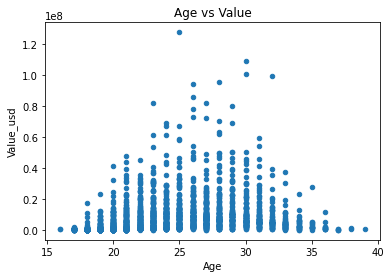

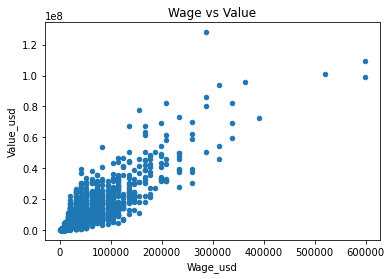

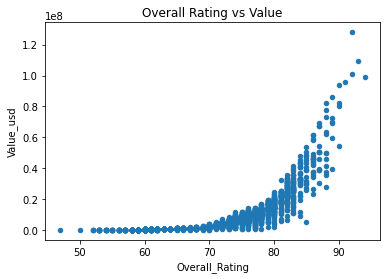

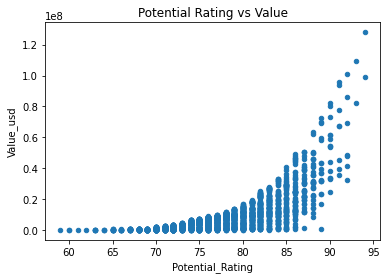

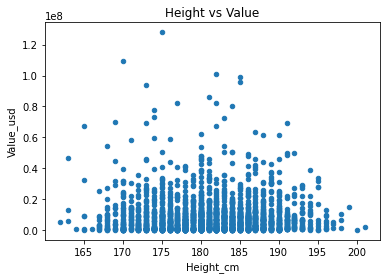

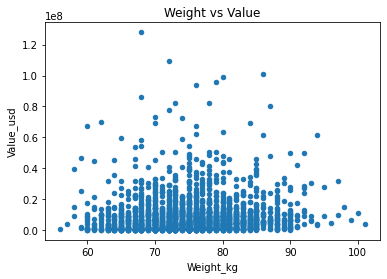

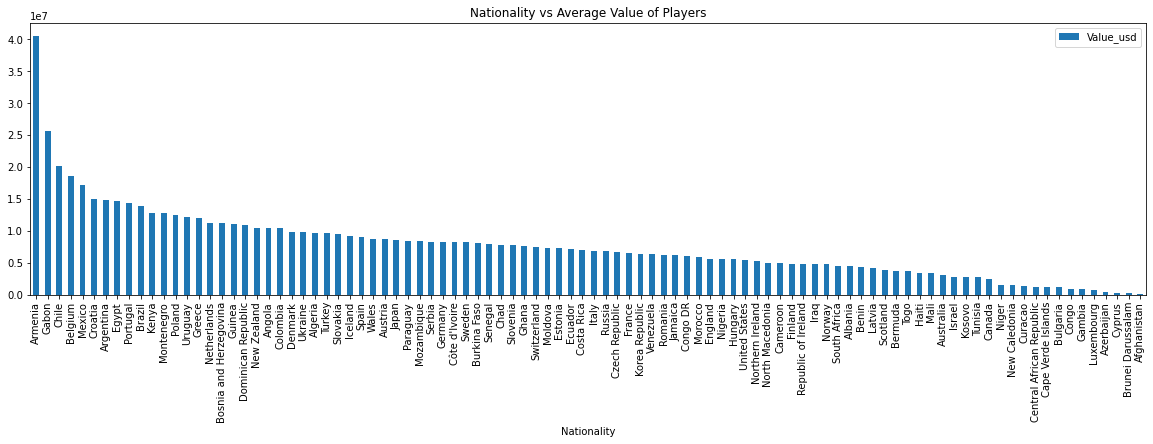

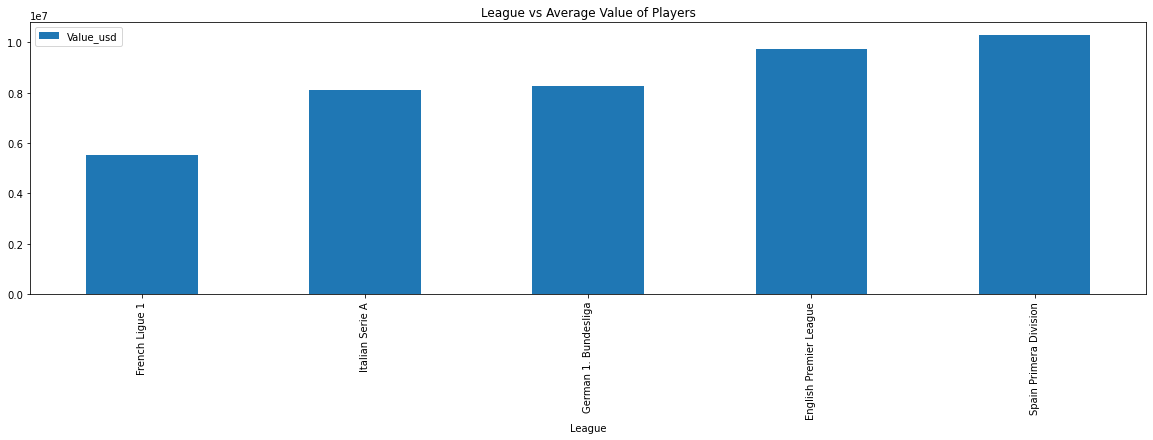

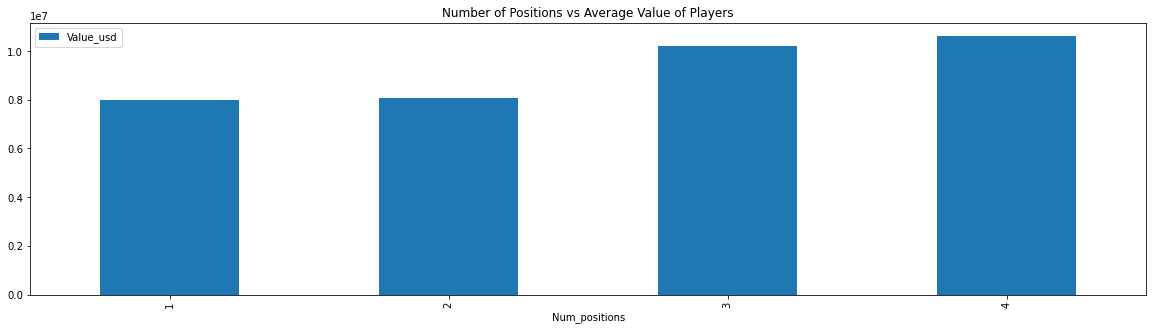

In [8]:
#Data Visualizations 2018
age_vs_value_18 = data_18.plot.scatter(x='Age', y='Value_usd', title="Age vs Value")
wage_vs_value_18 = data_18.plot.scatter(x='Wage_usd', y='Value_usd', title="Wage vs Value")
orating_vs_value_18 = data_18.plot.scatter(x='Overall_Rating', y='Value_usd', title="Overall Rating vs Value")
prating_vs_value_18 = data_18.plot.scatter(x='Potential_Rating', y='Value_usd', title="Potential Rating vs Value")
height_vs_value_18 = data_18.plot.scatter(x='Height_cm', y='Value_usd', title="Height vs Value")
weight_vs_value_18 = data_18.plot.scatter(x='Weight_kg', y='Value_usd', title="Weight vs Value")
nationality_vs_average_value_18 = data_18.groupby("Nationality").mean().sort_values(by="Value_usd", ascending=False).plot.bar(y="Value_usd", figsize=(20,5), title="Nationality vs Average Value of Players")
league_vs_average_value_18 = data_18.groupby("League").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="League vs Average Value of Players")
num_positions_vs_average_value_18 = data_18.groupby("Num_positions").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="Number of Positions vs Average Value of Players")


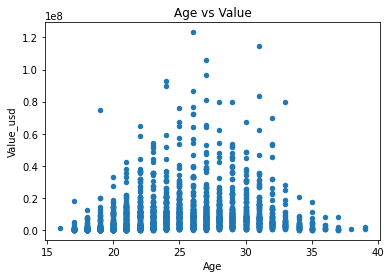

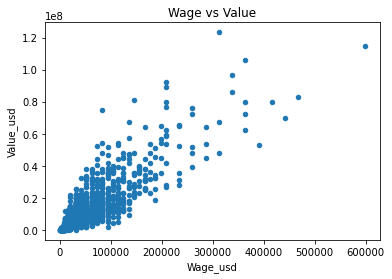

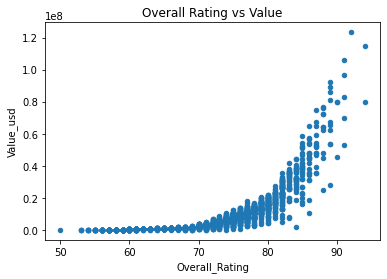

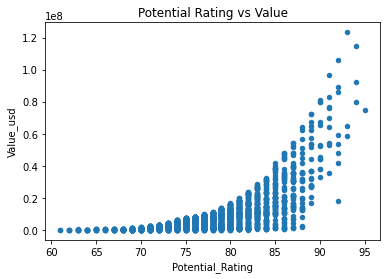

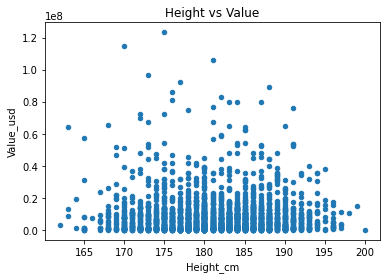

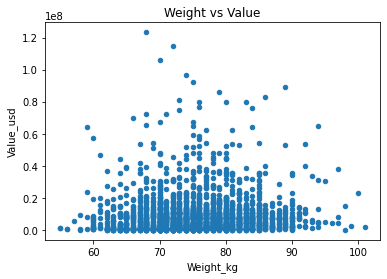

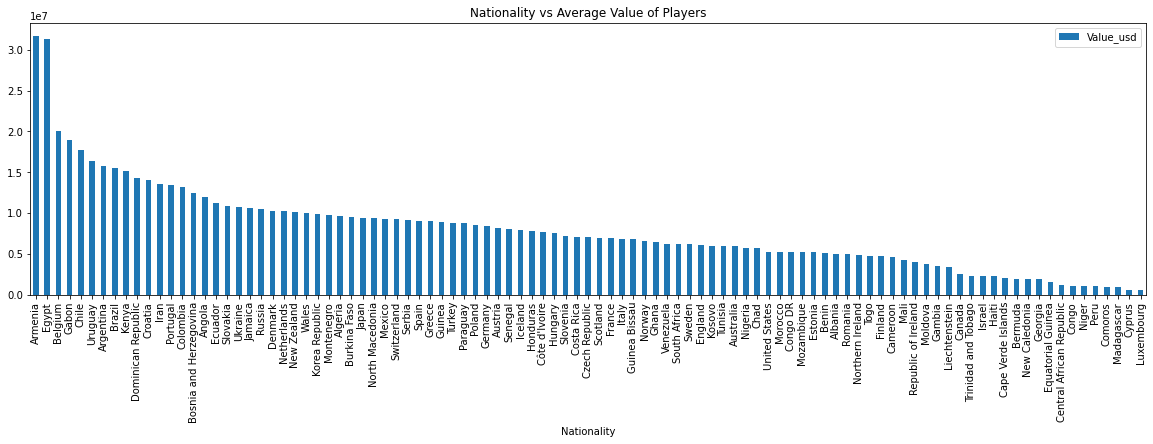

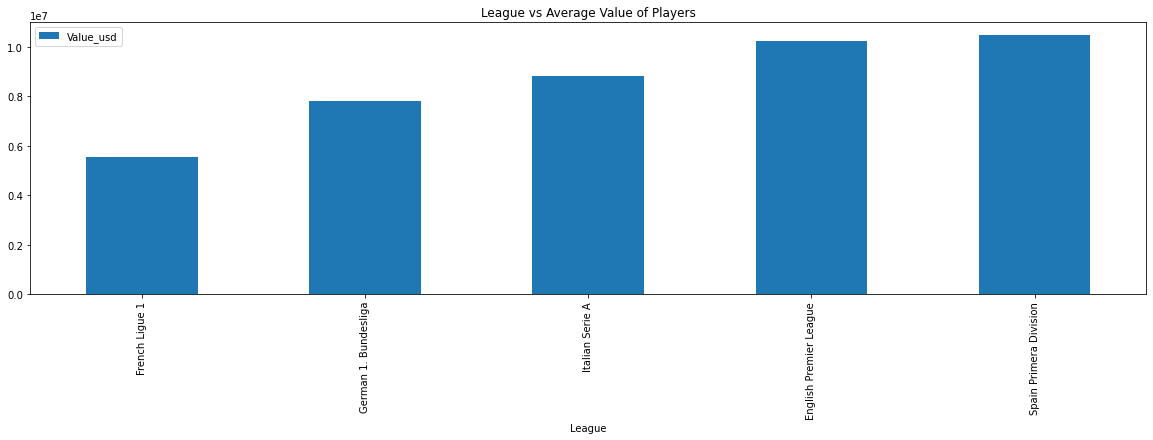

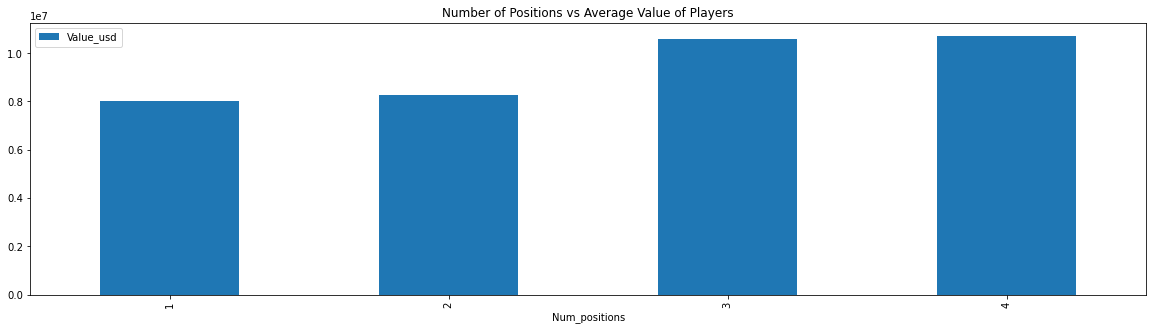

In [9]:
#Data Visualizations 2019
age_vs_value_19 = data_19.plot.scatter(x='Age', y='Value_usd', title="Age vs Value")
wage_vs_value_19 = data_19.plot.scatter(x='Wage_usd', y='Value_usd', title="Wage vs Value")
orating_vs_value_19 = data_19.plot.scatter(x='Overall_Rating', y='Value_usd', title="Overall Rating vs Value")
prating_vs_value_19 = data_19.plot.scatter(x='Potential_Rating', y='Value_usd', title="Potential Rating vs Value")
height_vs_value_19 = data_19.plot.scatter(x='Height_cm', y='Value_usd', title="Height vs Value")
weight_vs_value_19 = data_19.plot.scatter(x='Weight_kg', y='Value_usd', title="Weight vs Value")
nationality_vs_average_value_19 = data_19.groupby("Nationality").mean().sort_values(by="Value_usd", ascending=False).plot.bar(y="Value_usd", figsize=(20,5), title="Nationality vs Average Value of Players")
league_vs_average_value_19 = data_19.groupby("League").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="League vs Average Value of Players")
num_positions_vs_average_value_19 = data_19.groupby("Num_positions").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="Number of Positions vs Average Value of Players")

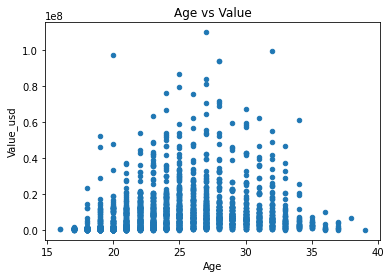

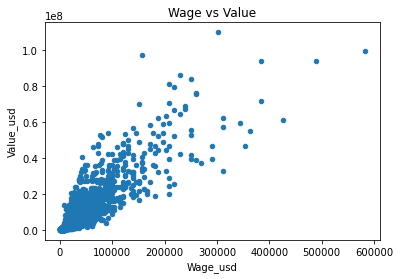

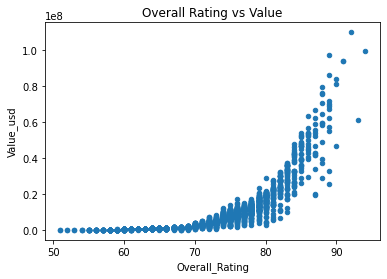

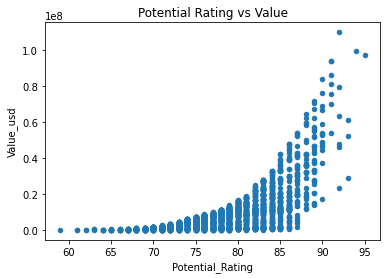

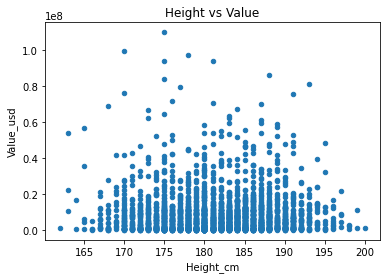

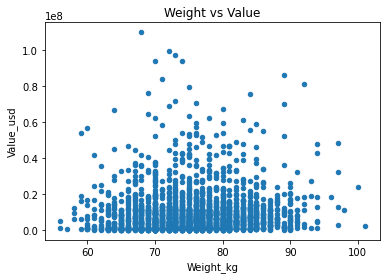

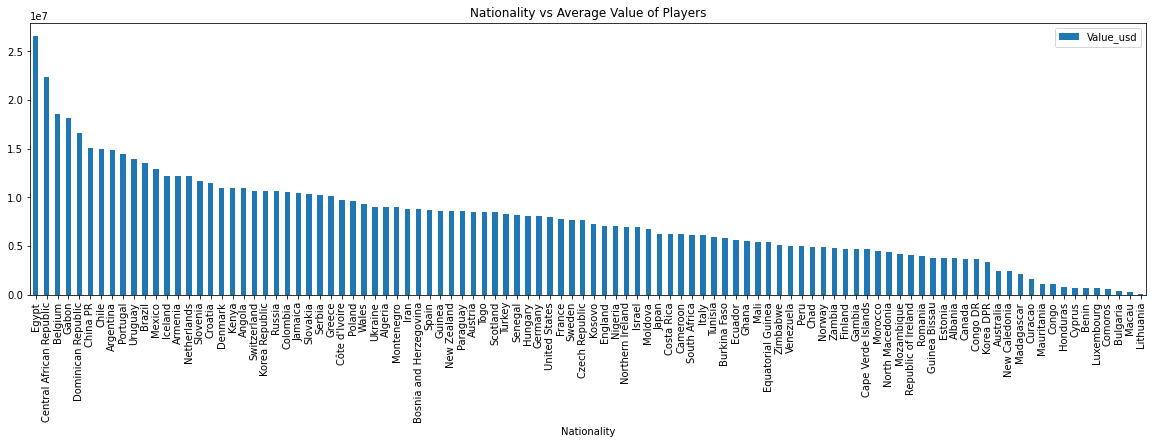

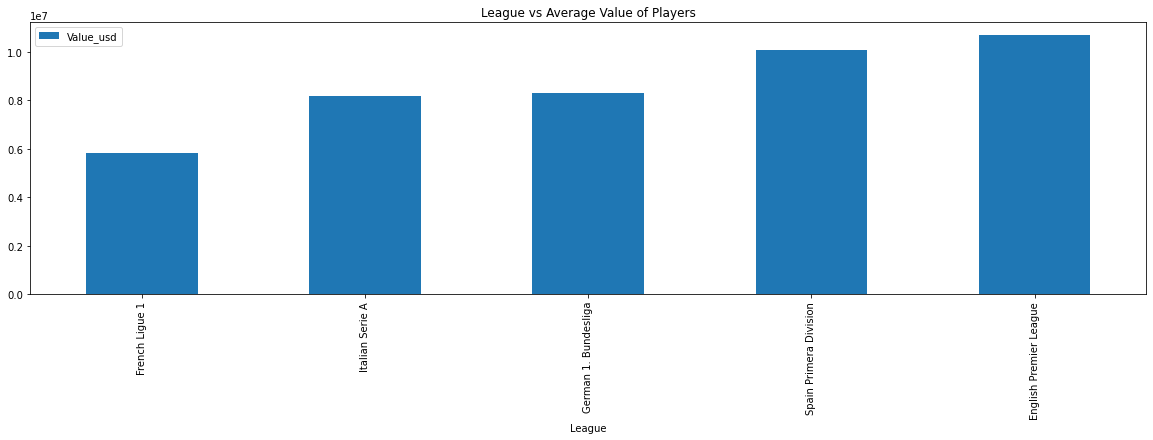

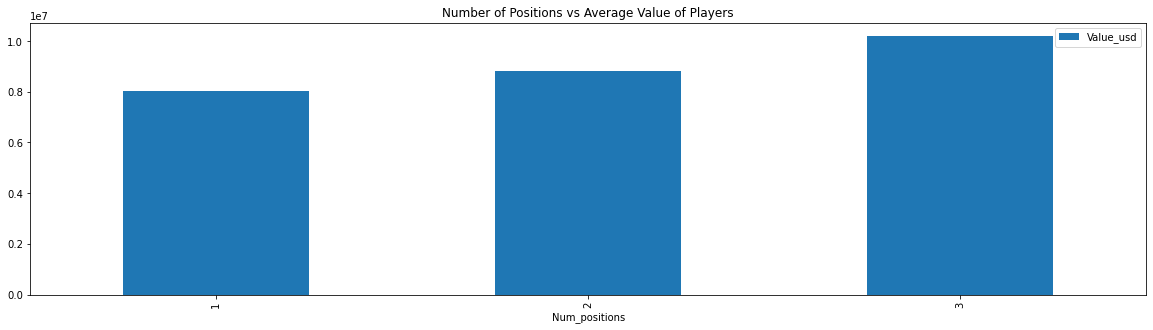

In [10]:
#Data Visualizations 2020
age_vs_value_20 = data_20.plot.scatter(x='Age', y='Value_usd', title="Age vs Value")
wage_vs_value_20 = data_20.plot.scatter(x='Wage_usd', y='Value_usd', title="Wage vs Value")
orating_vs_value_20 = data_20.plot.scatter(x='Overall_Rating', y='Value_usd', title="Overall Rating vs Value")
prating_vs_value_20 = data_20.plot.scatter(x='Potential_Rating', y='Value_usd', title="Potential Rating vs Value")
height_vs_value_20 = data_20.plot.scatter(x='Height_cm', y='Value_usd', title="Height vs Value")
weight_vs_value_20 = data_20.plot.scatter(x='Weight_kg', y='Value_usd', title="Weight vs Value")
nationality_vs_average_value_20 = data_20.groupby("Nationality").mean().sort_values(by="Value_usd", ascending=False).plot.bar(y="Value_usd", figsize=(20,5), title="Nationality vs Average Value of Players")
league_vs_average_value_20 = data_20.groupby("League").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="League vs Average Value of Players")
num_positions_vs_average_value_20 = data_20.groupby("Num_positions").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="Number of Positions vs Average Value of Players")

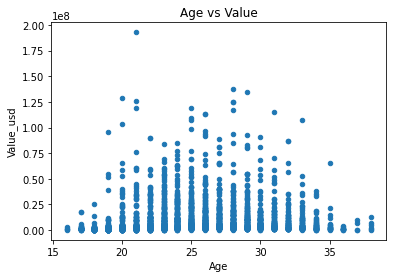

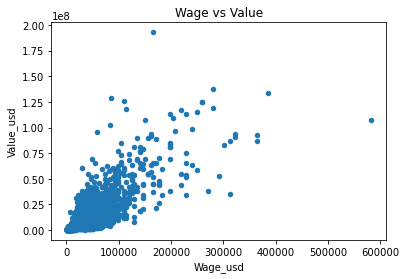

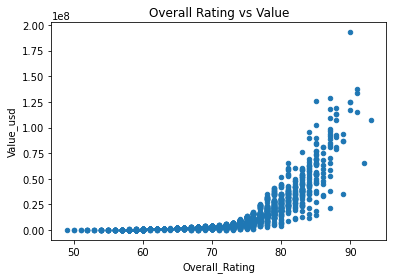

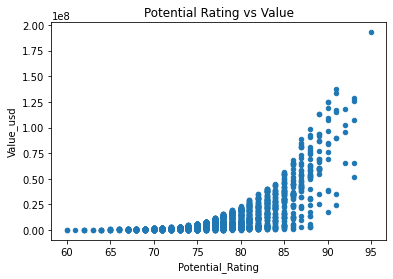

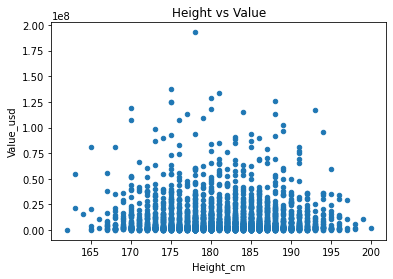

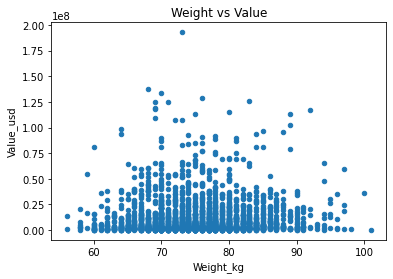

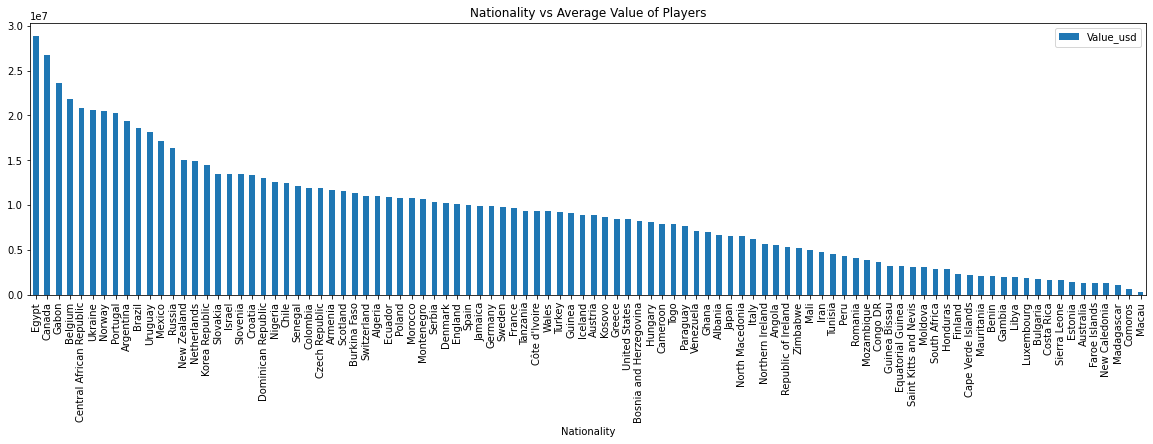

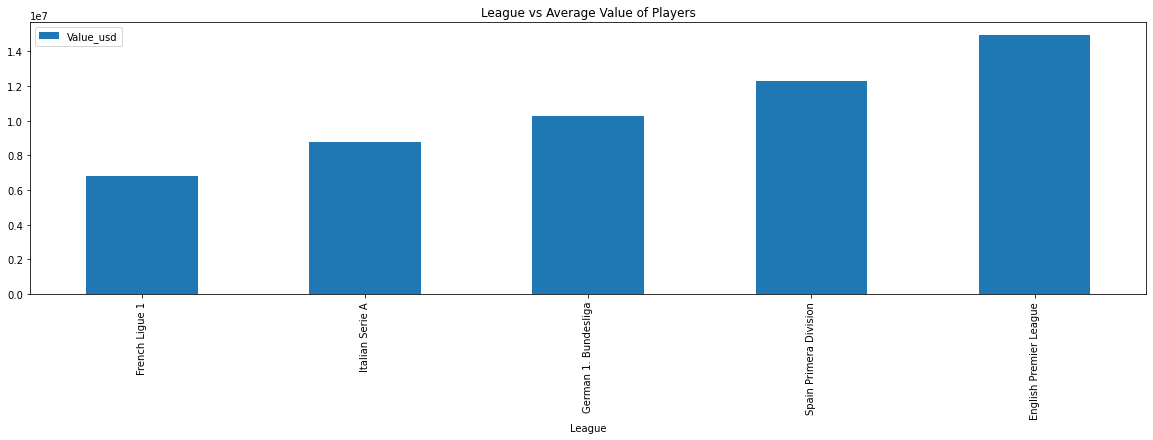

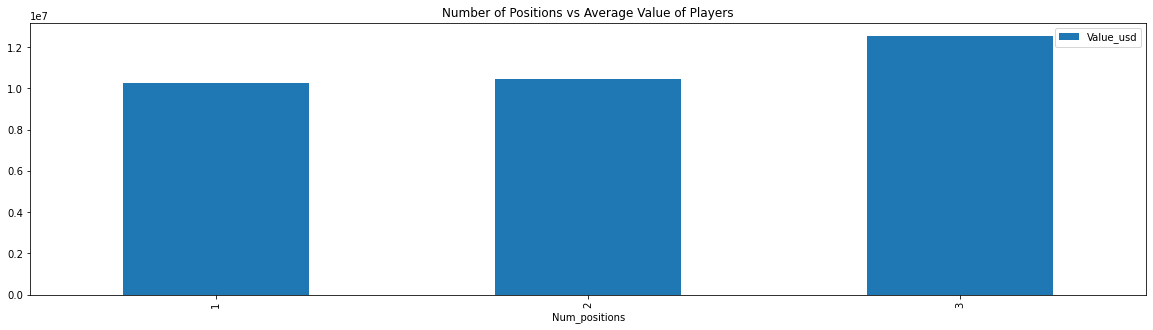

In [11]:
#Data Visualizations 2021
age_vs_value_21 = data_21.plot.scatter(x='Age', y='Value_usd', title="Age vs Value")
wage_vs_value_21 = data_21.plot.scatter(x='Wage_usd', y='Value_usd', title="Wage vs Value")
orating_vs_value_21 = data_21.plot.scatter(x='Overall_Rating', y='Value_usd', title="Overall Rating vs Value")
prating_vs_value_21 = data_21.plot.scatter(x='Potential_Rating', y='Value_usd', title="Potential Rating vs Value")
height_vs_value_21 = data_21.plot.scatter(x='Height_cm', y='Value_usd', title="Height vs Value")
weight_vs_value_21 = data_21.plot.scatter(x='Weight_kg', y='Value_usd', title="Weight vs Value")
nationality_vs_average_value_21 = data_21.groupby("Nationality").mean().sort_values(by="Value_usd", ascending=False).plot.bar(y="Value_usd", figsize=(20,5), title="Nationality vs Average Value of Players")
league_vs_average_value_21 = data_21.groupby("League").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="League vs Average Value of Players")
num_positions_vs_average_value_21 = data_21.groupby("Num_positions").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="Number of Positions vs Average Value of Players")

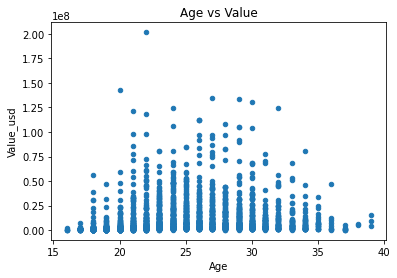

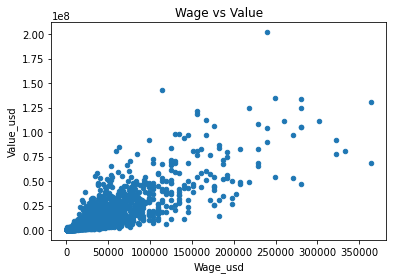

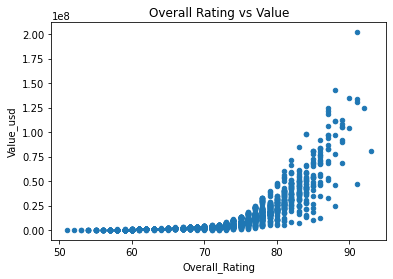

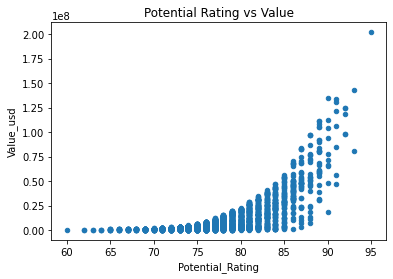

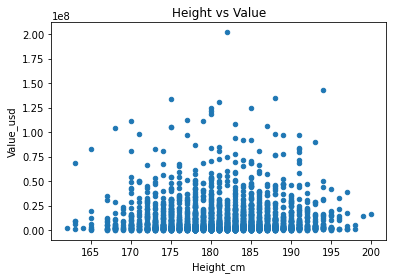

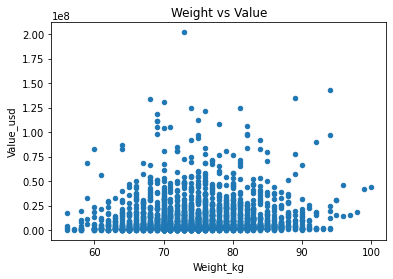

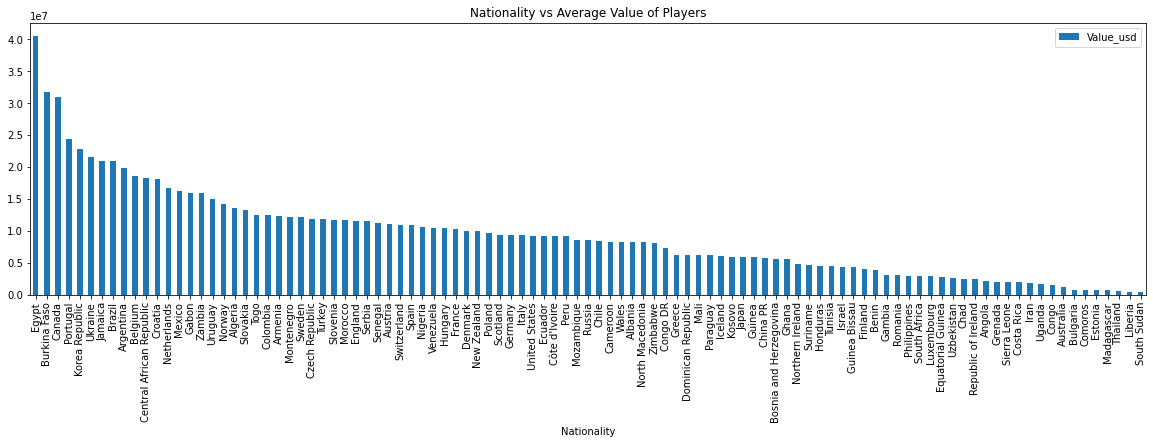

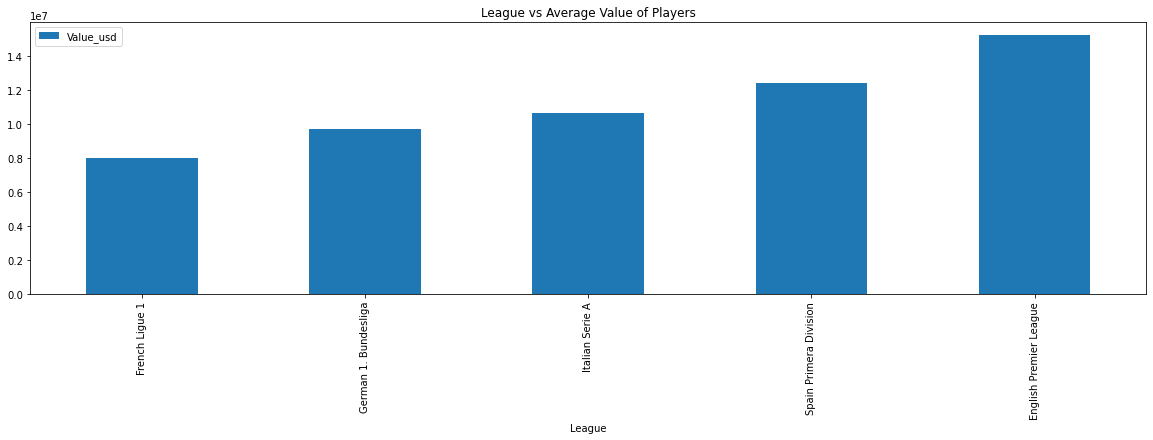

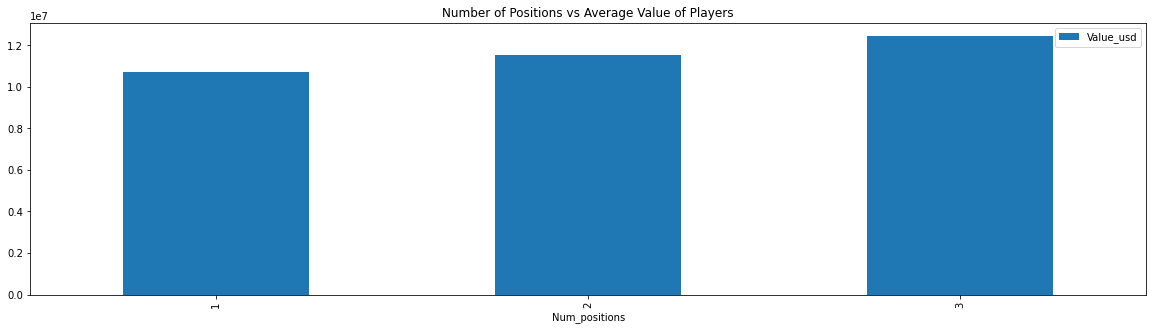

In [12]:
#Data Visualizations 2022
age_vs_value_22 = data_22.plot.scatter(x='Age', y='Value_usd', title="Age vs Value")
wage_vs_value_22 = data_22.plot.scatter(x='Wage_usd', y='Value_usd', title="Wage vs Value")
orating_vs_value_22 = data_22.plot.scatter(x='Overall_Rating', y='Value_usd', title="Overall Rating vs Value")
prating_vs_value_22 = data_22.plot.scatter(x='Potential_Rating', y='Value_usd', title="Potential Rating vs Value")
height_vs_value_22 = data_22.plot.scatter(x='Height_cm', y='Value_usd', title="Height vs Value")
weight_vs_value_22 = data_22.plot.scatter(x='Weight_kg', y='Value_usd', title="Weight vs Value")
nationality_vs_average_value_22 = data_22.groupby("Nationality").mean().sort_values(by="Value_usd", ascending=False).plot.bar(y="Value_usd", figsize=(20,5), title="Nationality vs Average Value of Players")
league_vs_average_value_22 = data_22.groupby("League").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="League vs Average Value of Players")
num_positions_vs_average_value_22 = data_22.groupby("Num_positions").mean().sort_values(by="Value_usd", ascending=True).plot.bar(y="Value_usd", figsize=(20,5), title="Number of Positions vs Average Value of Players")

<AxesSubplot:xlabel='Wage_usd', ylabel='Name'>

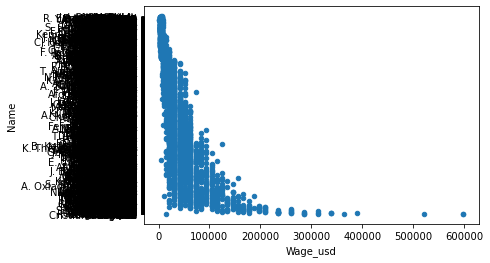

In [13]:
#maximum wage of all players
max_wage = data_18["Wage_usd"].max()
min_wage = data_18["Wage_usd"].min()
range_wage = max_wage - min_wage
data_18["Wage_usd"].to_frame().describe()

#minimum wage of all players
data_18["Wage_usd"].min()

data_18.plot.scatter(x="Wage_usd", y="Name")

# DataFrame Concatenation

In [14]:
import warnings
warnings.filterwarnings('ignore')

#concatenate dataframes from 2018-2022
all_dfs = pd.concat([data_18, data_19, data_20, data_21, data_22])

#creating new column with wage categories
wage_cat = []

for i in all_dfs["Wage_usd"]:
    if i < 50000:
        wage_cat.append("$0 - $50,000")
    elif 50000 < i < 100000:
        wage_cat.append("$50,000 - $100,000")
    elif 100000 < i < 150000:
        wage_cat.append("$100,000 - $150,000")
    elif 150000 < i < 200000:
        wage_cat.append("$150,000 - $200,000")
    elif 200000 < i < 250000:
        wage_cat.append("$200,000 - $250,000")
    else:
        wage_cat.append("$250,000 and above") 
        
#assigning new columns
all_dfs["Wage_cat"] = wage_cat

#create statistics column from pace, dribbling, shooting, passing, defending, and physic columns
stat_column = list()

df = all_dfs[['Pace', 'Dribbling', 'Shooting', 'Passing', 'Defending', 'Physic']]

for i in range(len(df)):
    stat_column.append(df.iloc[i].mean())
    
all_dfs['Player_stats'] = stat_column

# K-NN Labels

In [15]:
#knn_all_dataframes
knn_dfs = all_dfs[['Overall_Rating', 'Age', 'Wage_cat', 'Player_stats']]

#create labels
knn_class = {'$0 - $50,000':0, '$50,000 - $100,000':1, '$100,000 - $150,000':2, '$150,000 - $200,000':3, '$200,000 - $250,000':4, '$250,000 and above':5 }
knn_dfs['wage_num'] = [knn_class[i] for i in knn_dfs.Wage_cat]
knn_dfs

#assign train and test
X = knn_dfs.drop(['Wage_cat', 'wage_num'], axis=1)
y = knn_dfs['wage_num']

# Train Test Split and KNN Algorithm Accuracy

0.8180072028811525
26


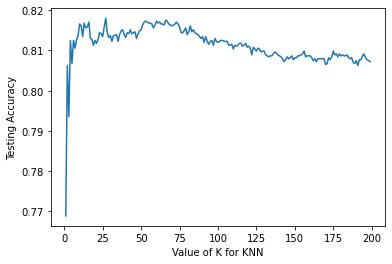

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

#Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

#Initialize model with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)

#Fit model
knn.fit(X_train, y_train)

#classifier score
knn.score(X_test, y_test)

#run through different k values to test accuracy
k_range = range(1,200)
scores = {}
scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))
    
#plot the k and their accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

# Get the highest score from list and determine final amount of KNN-neighbors
max_score = max(scores_list)
max_knn = scores_list.index(max_score)
print(max_score)
print(max_knn)

# K-Fold Cross Validation and K-NN Algorithm Accuracy

0.8088902043321934


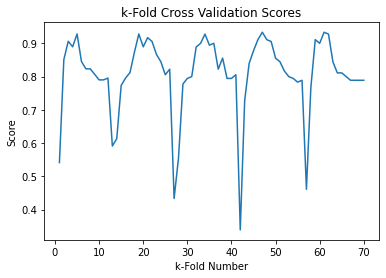

In [17]:
#import cross validation
from sklearn.model_selection import cross_val_score

#use the same model as before
knn = KNeighborsClassifier(n_neighbors=max_knn)

#X, y will automatically divided by 5 folds,the scoring I will still use the accuracy
scores = cross_val_score(knn, X, y, cv=70, scoring='accuracy')

#print all 5 times scores
scores

#then I will do the average about these five scores to get more accuracy score.
scores.mean()

# Plot score of k-Fold Cross-Validation
score_index = list(range(1, scores.size+1))
plt.plot(score_index, scores)
plt.title("k-Fold Cross Validation Scores")
plt.xlabel("k-Fold Number")
plt.ylabel("Score")

print(scores.mean())

# Predicted vs True Contract DataFrame (Cleaning and Set Up)

In [18]:
X.head()

,Overall_Rating,Age,Player_stats
0,94,32,78.000000
1,93,30,74.666667
3,92,30,76.833333
4,92,25,73.333333
5,91,28,75.000000


In [19]:
knn = KNeighborsClassifier(n_neighbors=max_knn)
knn.fit(X,y)

# Create predictions of each row
y_predict = knn.predict(X)
results = X.copy()
results['True Wage Group'] = knn_dfs['wage_num']
results["Predicted Wage Group"] = y_predict

In [20]:
# Add current contracts to wage group
results['True Contract'] = all_dfs['Wage_usd']
results

,Overall_Rating,Age,Player_stats,True Wage Group,Predicted Wage Group,True Contract
0,94,32,78.000000,5,5,598000.0
1,93,30,74.666667,5,5,598000.0
3,92,30,76.833333,5,5,520000.0
4,92,25,73.333333,5,5,286000.0
5,91,28,75.000000,5,5,364000.0
...,...,...,...,...,...,...
18272,54,19,49.000000,0,0,6240.0
18442,53,20,47.833333,0,0,5200.0
18510,53,17,53.166667,0,0,520.0
18692,52,21,53.833333,0,0,6240.0


In [21]:
'''
    Assign RGB values to each wage group.
    To be used for the graph
'''
def getRGB(wage):    
    # RGB colors for each wage group
    '''
    (1,0,0), # red
    (1,0.65,0), # orange
    (0.96,0.75,0), # dark yellow
    (0,0.4,0), # green
    (0,0,1), # blue
    (0.5,0,1) # violet
    '''
    colors = {
        0: (0,0,1), # blue
        1: (1,0,0), # red
        2: (0.5,0,1), # violet
        3: (1,0.65,0), # orange
        4: (0,0.4,0), # green
        5: (0.96,0.75,0) # dark yellow
    }
    
    return colors[wage]
    
    
y_train.apply(getRGB)   

15083       (0, 0, 1)
7307        (0, 0, 1)
1285        (0, 0, 1)
1609        (0, 0, 1)
123         (0, 0, 1)
             ...     
6963        (0, 0, 1)
385      (1, 0.65, 0)
685         (1, 0, 0)
1458        (0, 0, 1)
13947       (0, 0, 1)
Name: wage_num, Length: 8456, dtype: object

# Predicted vs True Contract DataFrame

In [22]:
results['Name'] = all_dfs['Name']
results

,Overall_Rating,Age,Player_stats,True Wage Group,Predicted Wage Group,True Contract,Name
0,94,32,78.000000,5,5,598000.0,Cristiano Ronaldo
1,93,30,74.666667,5,5,598000.0,L. Messi
3,92,30,76.833333,5,5,520000.0,L. Suárez
4,92,25,73.333333,5,5,286000.0,Neymar
5,91,28,75.000000,5,5,364000.0,R. Lewandowski
...,...,...,...,...,...,...,...
18272,54,19,49.000000,0,0,6240.0,C. Carty
18442,53,20,47.833333,0,0,5200.0,R. Hannam
18510,53,17,53.166667,0,0,520.0,B. Chrisene
18692,52,21,53.833333,0,0,6240.0,O. Ashley


# K-NN Plotting

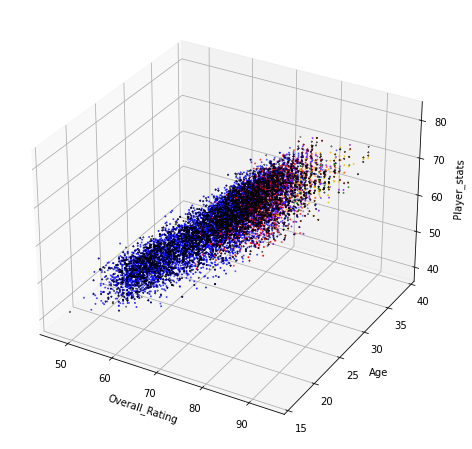

In [23]:
# Plotting KNN model of best KNN value
# x-axis: overall_rating
# y-axis: age
# z-axis: player_stats
# different colors: wage_cat

fig = plt.figure(figsize=(10,8))
ax = plt.axes(projection="3d")

ax.scatter3D(X_train['Overall_Rating'], 
             X_train['Age'],
             X_train['Player_stats'],
             c=y_train.apply(getRGB),
             cmap='hsv', marker='o', s=1)

sample = results.sample(frac=0.3)
ax.scatter3D(sample['Overall_Rating'], 
             sample['Age'],
             sample['Player_stats'],
             c='k',
             marker='x', s=1)

ax.set_xlabel('Overall_Rating')
ax.set_ylabel('Age')
ax.set_zlabel('Player_stats')
plt.show()

In [24]:
results["True Contract"]

0        598000.0
1        598000.0
3        520000.0
4        286000.0
5        364000.0
           ...   
18272      6240.0
18442      5200.0
18510       520.0
18692      6240.0
18877      5200.0
Name: True Contract, Length: 12621, dtype: float64

In [25]:
average_wage = {
    0: 25000,
    1: 75000,
    2: 125000,
    3: 175000,
    4: 225000,
    5: 300000
}

'''
    Input a row from the results dataframe
    Output the predicted contract based on the row
'''
def predictContract(row):    
    if row["True Wage Group"] == row["Predicted Wage Group"]:
        return row["True Contract"]
    elif row["True Wage Group"] != row["Predicted Wage Group"]:
        return (average_wage[row["Predicted Wage Group"]]+row["True Contract"])/2
        

results['Predicted Contract'] = results.apply(predictContract, axis=1)


Following includes the predicted contracts of players who were predicted the same wage group as their current one

# True and Predicted Wage Group is the Same for These Players

In [26]:
results['Name'] = all_dfs['Name']
results[results["True Wage Group"] == results["Predicted Wage Group"]]

,Overall_Rating,Age,Player_stats,True Wage Group,Predicted Wage Group,True Contract,Name,Predicted Contract
0,94,32,78.000000,5,5,598000.0,Cristiano Ronaldo,598000.0
1,93,30,74.666667,5,5,598000.0,L. Messi,598000.0
3,92,30,76.833333,5,5,520000.0,L. Suárez,520000.0
4,92,25,73.333333,5,5,286000.0,Neymar,286000.0
5,91,28,75.000000,5,5,364000.0,R. Lewandowski,364000.0
...,...,...,...,...,...,...,...,...
18272,54,19,49.000000,0,0,6240.0,C. Carty,6240.0
18442,53,20,47.833333,0,0,5200.0,R. Hannam,5200.0
18510,53,17,53.166667,0,0,520.0,B. Chrisene,520.0
18692,52,21,53.833333,0,0,6240.0,O. Ashley,6240.0


Following includes the predicted contracts of players who were predicted to be in a different wage group

# True and Predicted Wage Group Differs for These Players

In [27]:
results['Name'] = all_dfs['Name']
results[results["True Wage Group"] != results["Predicted Wage Group"]]

,Overall_Rating,Age,Player_stats,True Wage Group,Predicted Wage Group,True Contract,Name,Predicted Contract
18,89,26,75.333333,5,4,286000.0,K. De Bruyne,255500.0
19,88,33,73.166667,4,5,234000.0,A. Robben,267000.0
20,88,35,71.666667,4,5,234000.0,Z. Ibrahimović,267000.0
21,88,32,73.666667,3,5,176800.0,Thiago Silva,238400.0
23,88,28,66.666667,5,2,260000.0,M. Özil,192500.0
...,...,...,...,...,...,...,...,...
2338,74,22,61.500000,1,0,58240.0,E. Nketiah,41620.0
3001,73,24,55.666667,1,0,54080.0,N. Phillips,39540.0
3017,73,20,68.500000,1,0,50960.0,C. Jones,37980.0
3290,72,24,58.333333,1,0,53040.0,C. Musonda,39020.0


# Findings and Visualizations

We started by using the “split, train, and test” technique and decided to split the data into thirds with a random state of 42. We found the k-value of 26 neighbors within a range of 1 to 200 to be the most optimal which produced an accuracy of 81%. We accomplished this by running a For Loop through the list of k values and returned one list with the accuracies and another with the corresponding k-value that achieved those accuracies. With these two lists, we were able to visualize the value of K for the K-nn algorithm and find the testing accuracies using a line plot that reached a maximum of 0.81 when the x-axis was at 26.

We decided to produce a confusion matrix in order to determine the precision and recall of the K-nn algorithm using the split, train, and testing dividing the data by one-third. As we can see, there are very few false negatives and the precision and recall of the K-nn algorithm is very high.

After using the split, train, test, technique alongside the K-nn algorithm, we thought that we could take even more advantage of the data available to us if we split the data using K-fold Cross Validation and get an even higher accuracy. After running the splitting technique with K-nn as the algorithm, we were able to get a similar accuracy. Since we got a very similar accuracy to the split, train, and test technique, for the sake of parsimony, we chose to go with the split, train, and test technique since we got the same accuracy. We also plotted the number of K-folds with its corresponding level of accuracy and calculated the average score out of all the folds.

<AxesSubplot:xlabel='Predicted Contract', ylabel='True Contract'>

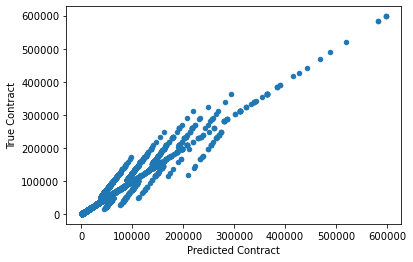

In [28]:
import seaborn as sns
results.plot.scatter(x='Predicted Contract', y='True Contract')

There seems to be a postive strong linear association between predicted contract and the true contract of every player.

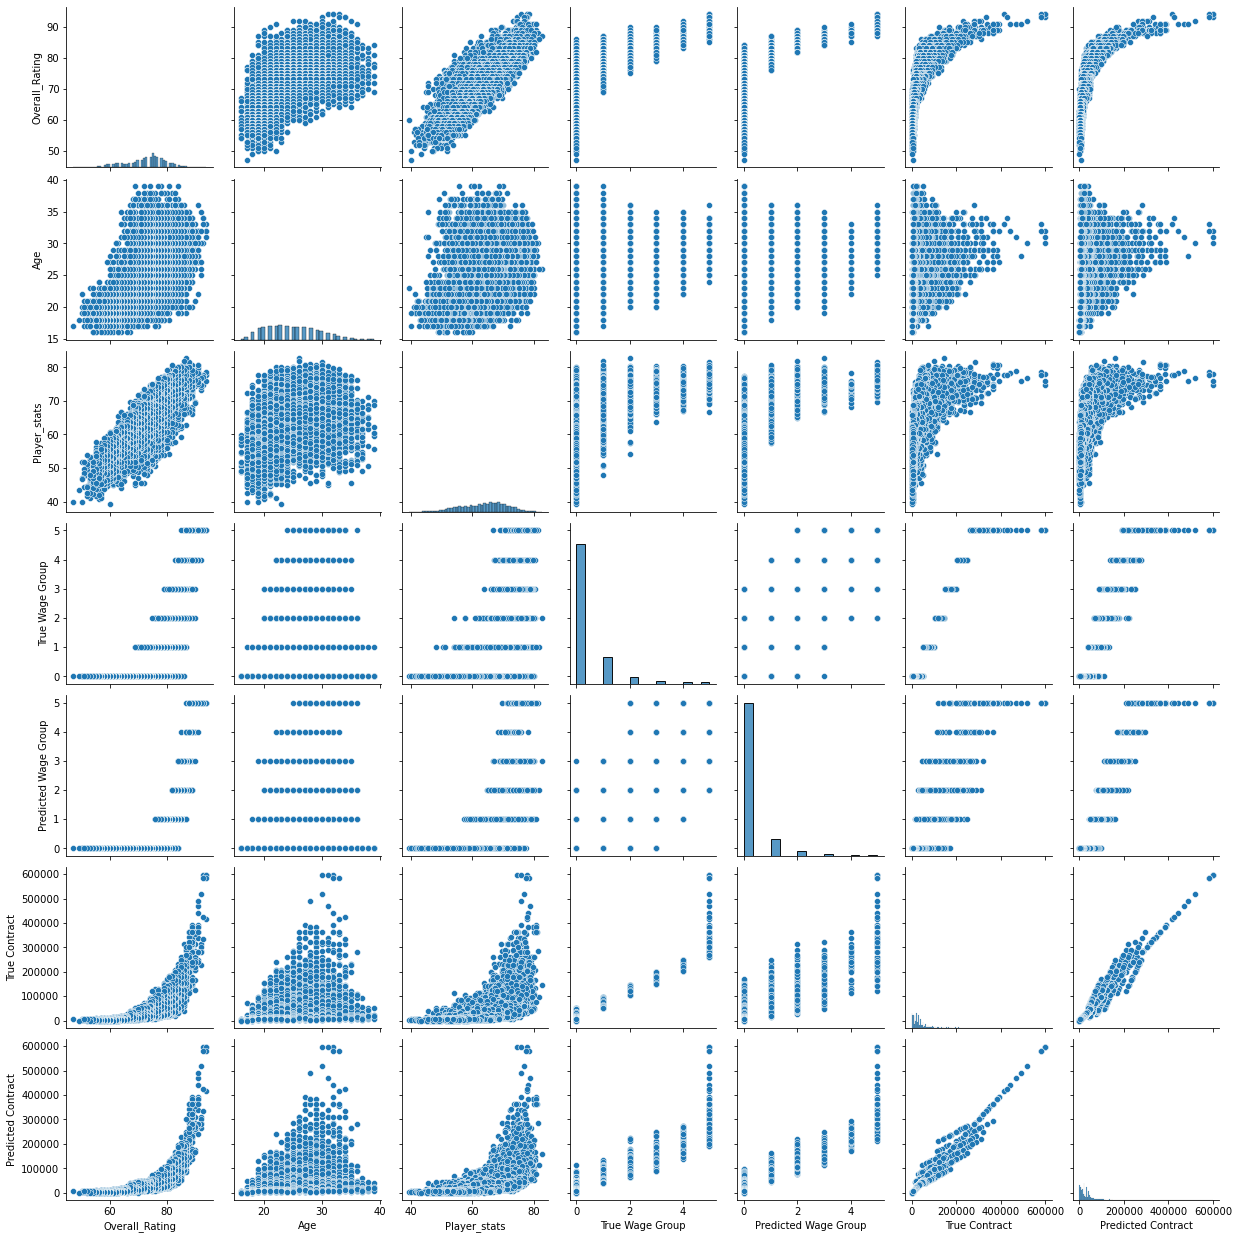

In [29]:
sns.pairplot(results)

Here we see an overview of all the graphs illustrating the different relationships between the different variables.

<AxesSubplot:xlabel='Predicted Wage Group', ylabel='Predicted Contract'>

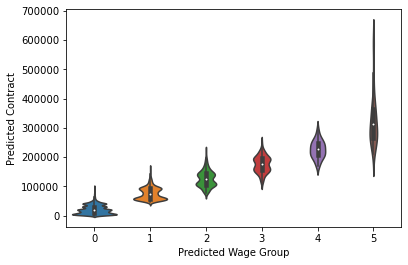

In [30]:
sns.violinplot(y='Predicted Contract', x='Predicted Wage Group', data=results)

This plot illustrates a box plot depicting predicted contracts vs the predicted wage group. As the label in the wage group increases, there seems to be a decrease in the variance. We can also see how group 5 is the longest compared to the others and has a tail unlike the others along with group 5 in the true wage/contract plot. This tail which is visible near 200,000 on the y-axis exists as we predict players in the 5th group to slowly depreciate in monetary value due to cases such as aging. They're still considered group 5, but as they age they are bound to not be as good as they used to which produces this tail in predicting. 

<AxesSubplot:xlabel='True Wage Group', ylabel='True Contract'>

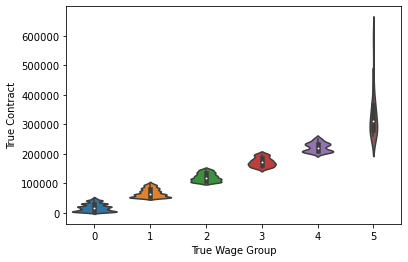

In [31]:
sns.violinplot(y='True Contract', x='True Wage Group', data=results)

This is the violin box plot for true contract vs true wage group. The same mechanics as the predicted contracts/wage group plot is applied here where we can still see a decrease in variance as wage group increases - highlighting the trend of fewer players being placed in group 5. Group 5's tail below 200,000 isn't there, as depicted in the predicted plot, but it is reasonable to predict its growth as popular players within this group age and lose skill over time.

# Results and Analysis

Based on the results in the final data frame which holds the multiple labels and predicted contracts, we can see that players on the ends of the wage spectrum (most paid and least paid) are correctly classified most of the time, after being added into the KNN model. This tells us that players who are performing the best and worse based on our expectations, and being correctly paid for their performance. However, wage groups that fall in the middle, like wage groups 2-4, contain many players which statistically should be paid significantly differently to fall in the range of a wage group containing players who perform similar to them. This was something we expected as logically it makes sense the highest paid players are players who have already established themselves as some of the best players statistically and therefore deserve to get paid in the highest wage range. Similarly, those players who are in the lowest wage group tend to be younger, less experienced, and therefore don’t perform too well yet. This leads to these players being classified correctly as their wage and stats aren’t the highest. For wage groups 2 through 4, many players in these wage groups are players whose performances tend to continue to improve and show much potential, or players who have peaked and are on their way down, causing them to be paid in a range of a wage group, where they don’t statistically belong. Overall, we saw that 81% of the players are still accurately classified into the wage group based on performance that matches their current actual wage. Our visualizations also help us see the comparisons of any differences between correct classifications versus the incorrect one, which continues to elaborate our original observations. Also, we compare multiple other variables against the predicted and true labels to see trends and confirm our model is working as expected. Additionally, our results help guide us on how to continue to grow this project and make it even more accurate and helpful into actual tool that can be used as a framework to establish new contracts.

# Ethics & Privacy

For our data which is based strictly on game statistics and performances for individual players and their team, there are no privacy concerns as this data is made public, usually in real-time while the events are happening. This public data can be found on multiple websites which are free to access. To ensure a minimal amount of bias when working with this data, we can cross-reference game statistics across multiple sport websites to ensure accuracy and fairness. For our data which isn’t public, like from StatsBomb, there still isn’t any privacy issues since they simply analyze data which is already publicly available. As discussed, there are no privacy concerns with the data that has been implemented. However, we do have potential biases. The analyzed data that we’ll use from StatsBomb, could introduce a source of bias since their analysis methods may not be completely transparent on which variables they use or if they choose some factors to have more weight than others. Using multiple sources and points of view will allow us to potentially avoid as much bias as possible. Another bias to note is that we are selecting players from popular and wealthier leagues to do further analyses based on our predisposed beliefs that they would show stronger correlations. However, we can address this bias by sampling from random smaller division leagues in different countries in our analysis. Another bias problem is that major economic events may have an effect on our data, causing our results to possibly be skewed.

Some ethics that we should also consider are the biases which we introduced into our model. These biases are due to the decision where we chose which variables/features are considered most important to see which players are similar. Another bias is that the “overall” variable which we chose as important, also contains bias itself as some factors used to calculate this value are weighted differently depending on which features are seen as more valuable and it is not clear how these weights are determined.


# Conclusions and Discussions

As we progressed through this project, we had to be flexible with our goals and methods. They had to be adjusted from our initial proposal as we continued learning and exploring which classification model best fit our data. Our goals continued to evolve to make more sense with the model we chose to utilize to make our predictions as well as to be reasonable enough to produce answers with our current capabilities. Our results and analysis leads us to believe that accurate contract predictions are more complicated than expected as many factors besides performance can affect the players’ contracts. For example, big-name players with a large following, connections, previous success/history, and other similar factors, can incentivize a team to offer even more or less money than someone statistically deserves. These hard to quantify variables are definitely worth further discussing as to how they can be computed into the model to further improve the accuracy. Another interesting finding which was found during the analysis was that the optimal number of neighbors for KNN wasn’t as high as expected since we would think that in a large dataset, more neighbors would be efficient. 

# What We Can Do Next


As we only had limited time to work on this project, there were many ideas which we were not able to implement at the moment. However, this allows us to grow our project in the future using the many ideas and methods which can add more depth and accuracy to our model. Something we would like to do in the future in order to create a more accurate contract prediction would be to add another layer of KNN where once we see which wage group every player is classified into, then we would do another KNN classification to find the K nearest neighbors, and derive an average from those specific ones rather than the group. Something else which we can do is add a step before our KNN model in order to find which features are the best using a decision tree. This way we can remove the bias which we added by hand choosing the “most important” variables. Finally, another idea which came to mind that can make contract predictions even more accurate would be to split up our data by league then run our KNN. This would help since different leagues might have different performance expectations which can cause the same player to have different contracts available depending on which league they choose to join. Overall, this project was a great introduction to how we can use machine learning in the real-world on topics that interest us.

# Team Expectations 

- Data Wrangling/ Coding and Cleaning Data Format.
- Statistical Analysis of Data.
- Explanation of Research. 
- Result Interpretation and Report Organization.
- Attending meetings/brainstorming
- Finishing tasks before the deadline
- Talk/Remind about tasks in the groupchat
- Jai, Arturo, Marco - Data visualizations, write-ups/responses, subject research
- Emmanuel, Hector - Data cleaning, analysis, model selection

# Project Timeline Proposal


| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 4/24  |  6 PM |  Finalize & submit proposal. Continue to look for potential data sources. Consider metrics to add or remove. | Assign group members to certain parts, possible metrics & variables, further potential data sources we can use | 
| 5/3  |  6 PM |  Finalize the data we want to use & import it. Begin cleaning/wrangling the data. | Review data & EDA, evaluate how we want to analyze the data. Consider if adding or removing data is necessary | 
| 5/13  | 6 PM  | Finish up data cleaning and start preliminary coding & evaluations  | Go over any final considerations about the project, data, variables or anything else significant before we fully work on & aim to finish the project   |
| 5/19  | 6 PM  | Project Checkpoint | responses for results/conclusions/ discussions   |
| 5/25  | 6 PM  | Continue to code project, begin to think about responses for results/conclusions/ discussions, etc. | Edit the project, discuss the path we’re on & if we need to make any changes - significant or not. Big model selection research, decision making, & implementation |
| 5/31  | 6 PM  | Finalize coding for project, make sure everything is accurate and successful. Begin and aim to complete responses for the results/conclusions/ discussions | Review write-up, findings from analysis, discuss final steps and roles for the final write-up/full project |
| 6/8  | Before 11:59 PM  | The project. | Turn in Final Project  |


# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
